In [ ]:
# Dataset
!wget -O train.csv https://github.com/tronn-ankush/Genetic-Disorder-ML/raw/master/train_genetic_disorders.csv

--2024-03-20 13:41:41--  https://github.com/tronn-ankush/Genetic-Disorder-ML/raw/master/train_genetic_disorders.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tronn-ankush/Genetic-Disorder-ML/master/train_genetic_disorders.csv [following]
--2024-03-20 13:41:42--  https://raw.githubusercontent.com/tronn-ankush/Genetic-Disorder-ML/master/train_genetic_disorders.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6540717 (6.2M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   6.24M  --.-KB/s    in 0.04s   

2024-03-20 13:41:42 (139 MB/s) - ‘train.csv’ saved

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!sudo pip install xgboost

In [ ]:
!sudo pip install --upgrade xgboost

In [ ]:
# Reading the dateaset
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

In [ ]:
df.shape

(22083, 45)

In [ ]:
X = df.copy()

In [ ]:
X.var()

<ipython-input-10-fdf0a9936c9b>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.var()


Patient Age                                          18.684736
Blood cell count (mcL)                                0.039932
Mother's age                                         96.968447
Father's age                                        169.720986
Test 1                                                0.000000
Test 2                                                0.000000
Test 3                                                0.000000
Test 4                                                0.000000
Test 5                                                0.000000
No. of previous abortion                              1.992298
White Blood cell count (thousand per microliter)      7.041770
Symptom 1                                             0.241543
Symptom 2                                             0.247216
Symptom 3                                             0.248614
Symptom 4                                             0.250006
Symptom 5                                             0

In [ ]:
X.drop("Patient Id", axis=1, inplace=True)
X.drop("Patient First Name", axis=1, inplace=True)
X.drop("Family Name", axis=1, inplace=True)
X.drop("Father's name", axis=1, inplace=True)
X.drop("Institute Name", axis=1, inplace=True)
X.drop("Location of Institute", axis=1, inplace=True)
X.drop("Place of birth", axis=1, inplace=True)
X.drop("Test 1", axis=1, inplace=True)
X.drop("Test 2", axis=1, inplace=True)
X.drop("Test 3", axis=1, inplace=True)
X.drop("Test 4", axis=1, inplace=True)
X.drop("Test 5", axis=1, inplace=True)
X.drop("Parental consent", axis=1, inplace=True)

In [ ]:
X.isna().sum() / len(df) * 100

Patient Age                                         11.049223
Genes in mother's side                               4.854413
Inherited from father                                6.154055
Maternal gene                                       17.053842
Paternal gene                                        4.854413
Blood cell count (mcL)                               4.854413
Mother's age                                        30.747634
Father's age                                        30.616311
Status                                               4.854413
Respiratory Rate (breaths/min)                      14.178327
Heart Rate (rates/min                               14.024363
Follow-up                                           14.228139
Gender                                              14.196441
Birth asphyxia                                      14.173799
Autopsy shows birth defect (if applicable)           9.228819
Folic acid details (peri-conceptional)              13.970022
H/O seri

In [ ]:
for col in X.columns:
  unique_vals = X[col].unique()
  print(f"Unique values in {col} : {unique_vals}")

Unique values in Patient Age : [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]
Unique values in Genes in mother's side : ['Yes' 'No' nan]
Unique values in Inherited from father : ['No' 'Yes' nan]
Unique values in Maternal gene : ['Yes' 'No' nan]
Unique values in Paternal gene : ['No' 'Yes' nan]
Unique values in Blood cell count (mcL) : [4.76060309 4.91066906 4.89329743 ... 5.22482777 5.13794212        nan]
Unique values in Mother's age : [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]
Unique values in Father's age : [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 21. 37. 36. 33. 46. 40. 45.]
Unique values in Status : ['Alive' 'Deceased' nan]
Unique values in Respiratory Rate (breaths/min) : ['Normal (30-60)' 'Tachypnea' nan]
Unique values in Heart Rate (rates/min : 

In [ ]:
from sklearn.impute import SimpleImputer

num = X.select_dtypes(include=['number'])
cat = X.select_dtypes(include=['object'])

num_imputer = SimpleImputer(strategy='most_frequent')
num_imputed = num_imputer.fit_transform(num)
num.columns = num.columns

cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputed = cat_imputer.fit_transform(cat)
cat.columns = cat.columns

X = pd.concat([pd.DataFrame(num_imputed, columns=num.columns),
                      pd.DataFrame(cat_imputed, columns=cat.columns)],
                      axis=1)

In [ ]:
X.isna().sum() / len(df) * 100

Patient Age                                         0.0
Blood cell count (mcL)                              0.0
Mother's age                                        0.0
Father's age                                        0.0
No. of previous abortion                            0.0
White Blood cell count (thousand per microliter)    0.0
Symptom 1                                           0.0
Symptom 2                                           0.0
Symptom 3                                           0.0
Symptom 4                                           0.0
Symptom 5                                           0.0
Genes in mother's side                              0.0
Inherited from father                               0.0
Maternal gene                                       0.0
Paternal gene                                       0.0
Status                                              0.0
Respiratory Rate (breaths/min)                      0.0
Heart Rate (rates/min                           

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in X:
  if(X[col].dtype == 'object'):
    X[col] = encoder.fit_transform(X[col])

In [ ]:
for col in X.columns:
  unique_vals = X[col].unique()
  print(f"{col} : {unique_vals}")

Patient Age : [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. 10.  5. 13.  8.  9.]
Blood cell count (mcL) : [4.76060309 4.91066906 4.89329743 ... 5.08483063 5.22482777 5.13794212]
Mother's age : [23. 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 49. 46. 18. 38. 37.
 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]
Father's age : [20. 23. 22. 63. 44. 42. 56. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52. 28.
 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59. 47.
 38. 54. 21. 37. 36. 33. 46. 40. 45.]
No. of previous abortion : [2. 4. 1. 0. 3.]
White Blood cell count (thousand per microliter) : [ 9.85756248  5.52255993 12.         ...  7.08631173  7.92474616
  6.75186636]
Symptom 1 : [1. 0.]
Symptom 2 : [1. 0.]
Symptom 3 : [1. 0.]
Symptom 4 : [1. 0.]
Symptom 5 : [1. 0.]
Genes in mother's side : [1 0]
Inherited from father : [0 1]
Maternal gene : [1 0]
Paternal gene : [0 1]
Status : [0 1]
Respiratory Rate (breaths/min) : [0 1]
Heart Rate (rates/min : [0 1]
Follow-up :

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  float64
 1   Blood cell count (mcL)                            22083 non-null  float64
 2   Mother's age                                      22083 non-null  float64
 3   Father's age                                      22083 non-null  float64
 4   No. of previous abortion                          22083 non-null  float64
 5   White Blood cell count (thousand per microliter)  22083 non-null  float64
 6   Symptom 1                                         22083 non-null  float64
 7   Symptom 2                                         22083 non-null  float64
 8   Symptom 3                                         22083 non-null  float64
 9   Symptom 4        

In [ ]:
X = X.apply(pd.to_numeric, downcast='float')

In [ ]:
X.dtypes

Patient Age                                         float32
Blood cell count (mcL)                              float32
Mother's age                                        float32
Father's age                                        float32
No. of previous abortion                            float32
White Blood cell count (thousand per microliter)    float32
Symptom 1                                           float32
Symptom 2                                           float32
Symptom 3                                           float32
Symptom 4                                           float32
Symptom 5                                           float32
Genes in mother's side                              float32
Inherited from father                               float32
Maternal gene                                       float32
Paternal gene                                       float32
Status                                              float32
Respiratory Rate (breaths/min)          

In [ ]:
X["Genetic Disorder"].value_counts()

0.0    12807
2.0     7291
1.0     1985
Name: Genetic Disorder, dtype: int64

In [ ]:
from sklearn.utils import resample

max_count = X['Genetic Disorder'].value_counts().max()

X = pd.concat([
    resample(X[X['Genetic Disorder'] == label], replace=True, n_samples=max_count, random_state=42).reset_index(drop=True)
    for label in X['Genetic Disorder'].unique()
])


In [ ]:
X["Genetic Disorder"].value_counts()

0.0    12807
1.0    12807
2.0    12807
Name: Genetic Disorder, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38421 entries, 0 to 12806
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       38421 non-null  float32
 1   Blood cell count (mcL)                            38421 non-null  float32
 2   Mother's age                                      38421 non-null  float32
 3   Father's age                                      38421 non-null  float32
 4   No. of previous abortion                          38421 non-null  float32
 5   White Blood cell count (thousand per microliter)  38421 non-null  float32
 6   Symptom 1                                         38421 non-null  float32
 7   Symptom 2                                         38421 non-null  float32
 8   Symptom 3                                         38421 non-null  float32
 9   Symptom 4        

In [ ]:
y = X.pop('Genetic Disorder')
y_alt = X.pop('Disorder Subclass')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols = X.columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=cols)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print("Score : ",scores.mean())

Score :  0.5576899332345947


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

scores = cross_val_score(KNeighborsClassifier(), X, y, cv=5)
print("Score : ",scores.mean())

Score :  0.7131516028201804


In [ ]:
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
print("Score : ",scores.mean())

Score :  0.8902682063837792


In [ ]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print("Score : ",scores.mean())

Score :  0.9076807107824791


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

scores = cross_val_score(ExtraTreesClassifier(), X, y, cv=5)
print("Score : ",scores.mean())

Score :  0.9139011412742157


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

scores = cross_val_score(AdaBoostClassifier(), X, y, cv=5)
print("Score : ",scores.mean())

Score :  0.5355925552491941


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

# scores = cross_val_score(GradientBoostingClassifier(), X, y, cv=5)
# print("Score : ",scores.mean())

Score :  0.6093021723057518


In [ ]:
# from sklearn.neural_network import MLPClassifier

# scores = cross_val_score(MLPClassifier(), X, y, cv=5)
# print("Score : ",scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score :  0.6909502139994994


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# import xgboost as xgb

# scores = cross_val_score(xgb.XGBClassifier(), X, y, cv=5)
# print("Score : ",scores.mean())

Score :  0.8356367302190595


In [ ]:
from sklearn.metrics import accuracy_score

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Score : ",accuracy_score(y_test, y_predict))

Score :  0.9109954456733897


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38421 entries, 0 to 38420
Data columns (total 30 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       38421 non-null  float32
 1   Blood cell count (mcL)                            38421 non-null  float32
 2   Mother's age                                      38421 non-null  float32
 3   Father's age                                      38421 non-null  float32
 4   No. of previous abortion                          38421 non-null  float32
 5   White Blood cell count (thousand per microliter)  38421 non-null  float32
 6   Symptom 1                                         38421 non-null  float32
 7   Symptom 2                                         38421 non-null  float32
 8   Symptom 3                                         38421 non-null  float32
 9   Symptom 4        

In [ ]:
y_predict = clf.predict(X)
X = pd.concat([pd.DataFrame(X, columns=X.columns),
               pd.DataFrame(y_predict, columns=["Genetic Disorder"])],axis=1)

In [ ]:
y_alt = pd.DataFrame(y_alt)

In [ ]:
y_alt.reset_index(drop=True, inplace=True)
print(y_alt.index.is_unique)
print(y_alt.info)

True
<bound method DataFrame.info of        Disorder Subclass
0                    7.0
1                    7.0
2                    6.0
3                    6.0
4                    6.0
...                  ...
38416                8.0
38417                4.0
38418                2.0
38419                8.0
38420                8.0

[38421 rows x 1 columns]>


In [ ]:
X = pd.concat([pd.DataFrame(X, columns=X.columns),
               pd.DataFrame(y_alt, columns=["Disorder Subclass"])],axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38421 entries, 0 to 38420
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       38421 non-null  float32
 1   Blood cell count (mcL)                            38421 non-null  float32
 2   Mother's age                                      38421 non-null  float32
 3   Father's age                                      38421 non-null  float32
 4   No. of previous abortion                          38421 non-null  float32
 5   White Blood cell count (thousand per microliter)  38421 non-null  float32
 6   Symptom 1                                         38421 non-null  float32
 7   Symptom 2                                         38421 non-null  float32
 8   Symptom 3                                         38421 non-null  float32
 9   Symptom 4        

In [ ]:
X["Disorder Subclass"].value_counts()

3.0    10353
6.0     9509
2.0     5447
8.0     4602
7.0     4225
4.0     2240
0.0      866
5.0      612
1.0      567
Name: Disorder Subclass, dtype: int64

In [ ]:
from sklearn.utils import resample

max_count = X['Disorder Subclass'].value_counts().max()

X = pd.concat([
    resample(X[X['Disorder Subclass'] == label], replace=True, n_samples=max_count, random_state=42).reset_index(drop=True)
    for label in X['Disorder Subclass'].unique()
])

In [ ]:
X["Disorder Subclass"].value_counts()

7.0    10353
6.0    10353
1.0    10353
5.0    10353
2.0    10353
4.0    10353
8.0    10353
0.0    10353
3.0    10353
Name: Disorder Subclass, dtype: int64

In [ ]:
y_alt = X.pop('Disorder Subclass')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_alt, test_size = 0.2, random_state = 42)

In [ ]:
scores = cross_val_score(LogisticRegression(), X, y_alt, cv=5)
print("Score : ",scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Score :  0.7006128077061093


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
scores = cross_val_score(KNeighborsClassifier(), X, y_alt, cv=5)
print("Score : ",scores.mean())

Score :  0.909355297164096


In [ ]:
scores = cross_val_score(DecisionTreeClassifier(), X, y_alt, cv=5)
print("Score : ",scores.mean())

Score :  0.9787179030888626


In [ ]:
scores = cross_val_score(RandomForestClassifier(), X, y_alt, cv=5)
print("Score : ",scores.mean())

Score :  0.9834186432887684


In [ ]:
scores = cross_val_score(ExtraTreesClassifier(), X, y_alt, cv=5)
print("Score : ",scores.mean())

Score :  0.9842020973971979


In [ ]:
scores = cross_val_score(AdaBoostClassifier(), X, y_alt, cv=5)
print("Score : ",scores.mean())

Score :  0.5471201835880515


In [ ]:
scores = cross_val_score(GradientBoostingClassifier(), X, y_alt, cv=5)
print("Score : ",scores.mean())

Score :  0.7887246745338211


In [ ]:
scores = cross_val_score(MLPClassifier(), X, y_alt, cv=5)
print("Score : ",scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score :  0.8624552920788895


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
scores = cross_val_score(xgb.XGBClassifier(), X, y_alt, cv=5)
print("Score : ",scores.mean())

Score :  0.9666548365065772


In [ ]:
clf_alt = ExtraTreesClassifier()
clf_alt.fit(X_train, y_train)
y_predict = clf_alt.predict(X_test)
print("Score : ",accuracy_score(y_test, y_predict))

Score :  0.983419188667096


In [ ]:
!wget -O test.csv https://github.com/tronn-ankush/Genetic-Disorder-ML/raw/master/test_genetic_disorders.csv

--2024-03-20 14:15:14--  https://github.com/tronn-ankush/Genetic-Disorder-ML/raw/master/test_genetic_disorders.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tronn-ankush/Genetic-Disorder-ML/master/test_genetic_disorders.csv [following]
--2024-03-20 14:15:14--  https://raw.githubusercontent.com/tronn-ankush/Genetic-Disorder-ML/master/test_genetic_disorders.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2448831 (2.3M) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   2.33M  --.-KB/s    in 0.01s   

2024-03-20 14:15:14 (180 MB/s) - ‘test.csv’ saved [244

In [ ]:
test = pd.read_csv('test.csv')
test = test.replace('-99', np.nan)
test = test.replace(-99, np.nan)

In [ ]:
test.drop("Patient Id", axis=1, inplace=True)
test.drop("Patient First Name", axis=1, inplace=True)
test.drop("Family Name", axis=1, inplace=True)
test.drop("Father's name", axis=1, inplace=True)
test.drop("Institute Name", axis=1, inplace=True)
test.drop("Location of Institute", axis=1, inplace=True)
test.drop("Place of birth", axis=1, inplace=True)
test.drop("Test 1", axis=1, inplace=True)
test.drop("Test 2", axis=1, inplace=True)
test.drop("Test 3", axis=1, inplace=True)
test.drop("Test 4", axis=1, inplace=True)
test.drop("Test 5", axis=1, inplace=True)
test.drop("Parental consent", axis=1, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

num = test.select_dtypes(include=['number'])
cat = test.select_dtypes(include=['object'])

num_imputer = SimpleImputer(strategy='most_frequent')
num_imputed = num_imputer.fit_transform(num)
num.columns = num.columns

cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputed = cat_imputer.fit_transform(cat)
cat.columns = cat.columns

test = pd.concat([pd.DataFrame(num_imputed, columns=num.columns),
                      pd.DataFrame(cat_imputed, columns=cat.columns)],
                      axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in test:
  if(test[col].dtype == 'object'):
    test[col] = encoder.fit_transform(test[col])

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 30 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       9463 non-null   float64
 1   Blood cell count (mcL)                            9463 non-null   float64
 2   Mother's age                                      9463 non-null   float64
 3   Father's age                                      9463 non-null   float64
 4   No. of previous abortion                          9463 non-null   float64
 5   White Blood cell count (thousand per microliter)  9463 non-null   float64
 6   Genes in mother's side                            9463 non-null   int64  
 7   Inherited from father                             9463 non-null   int64  
 8   Maternal gene                                     9463 non-null   int64  
 9   Paternal gene      

In [ ]:
cols = test.columns
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled, columns=cols)

In [ ]:
test = test[clf.feature_names_in_]

In [ ]:
test_y_predict = clf.predict(test)
print(pd.DataFrame(test_y_predict).value_counts())
test = pd.concat([pd.DataFrame(test, columns=test.columns),
               pd.DataFrame(test_y_predict, columns=["Genetic Disorder"])],axis=1)

0.0    5340
2.0    2472
1.0    1651
dtype: int64


In [ ]:
test = test[clf_alt.feature_names_in_]

In [ ]:
test_y_predict = clf_alt.predict(test)
pd.DataFrame(test_y_predict).value_counts()

6.0    3518
2.0    1787
7.0    1693
3.0    1645
8.0     574
5.0     120
4.0     119
0.0       7
dtype: int64

In [ ]:
test = pd.concat([pd.DataFrame(test, columns=test.columns),
                  pd.DataFrame(test_y_predict, columns=["Disorder Subclass"])],axis=1)

In [ ]:
sub = pd.concat([test["Genetic Disorder"], test["Disorder Subclass"]], axis=1)

In [ ]:
sub['Genetic Disorder'] = sub['Genetic Disorder'].apply(lambda x: {0: 'Mitochondrial', 1: 'Single-gene', 2: 'Multifactorial'}[x])

In [ ]:
sub['Disorder Subclass'] = sub['Disorder Subclass'].apply(lambda x: {0: "Leber's hereditary optic neuropathy",
                                                                     1: "Cystic fibrosis",
                                                                     2: 'Diabetes',
                                                                     3: 'Leigh syndrome',
                                                                     4: 'Cancer',
                                                                     5: 'Tay-Sachs',
                                                                     6: 'Hemochromatosis',
                                                                     7: 'Mitochondrial myopathy',
                                                                     8: "Alzheimer's"
                                                                     }[x])

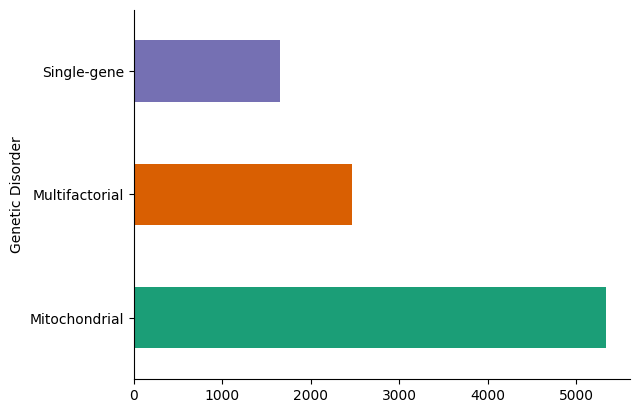

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sub.groupby('Genetic Disorder').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

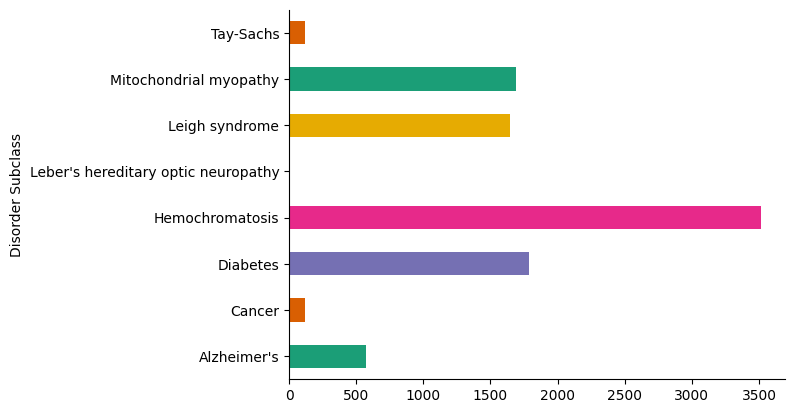

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sub.groupby('Disorder Subclass').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)